In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv('../data/cars.csv',  sep=';')
data.head()

,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,...,REV_Garantia,Averia_grave,QUEJA_CAC,EDAD_COCHE,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad Cliente,Tiempo
0,CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,...,NO DATA,Averia muy grave,SI,2.08,2892,0,0,2,18,0
1,CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,...,SI,No,NO,2.45,1376,7187,0,2,53,0
2,CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,...,NO DATA,No,NO,2.51,1376,0,1,4,21,3
3,CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,...,SI,Averia muy grave,SI,2.43,2015,7256,1,4,48,5
4,CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,...,NO DATA,No,NO,2.30,1818,0,1,3,21,3


In [3]:
data.dtypes

CODE                object
PRODUCTO            object
TIPO_CARROCERIA     object
COMBUSTIBLE         object
Potencia_           object
TRANS               object
FORMA_PAGO          object
ESTADO_CIVIL        object
GENERO              object
OcupaciOn           object
PROVINCIA           object
Campanna1           object
Campanna2           object
Campanna3           object
Zona _Renta         object
REV_Garantia        object
Averia_grave        object
QUEJA_CAC           object
EDAD_COCHE         float64
COSTE_VENTA          int64
km_anno              int64
Mas_1_coche          int64
Revisiones           int64
Edad Cliente         int64
Tiempo               int64
dtype: object

## Análisis variables numéricas.

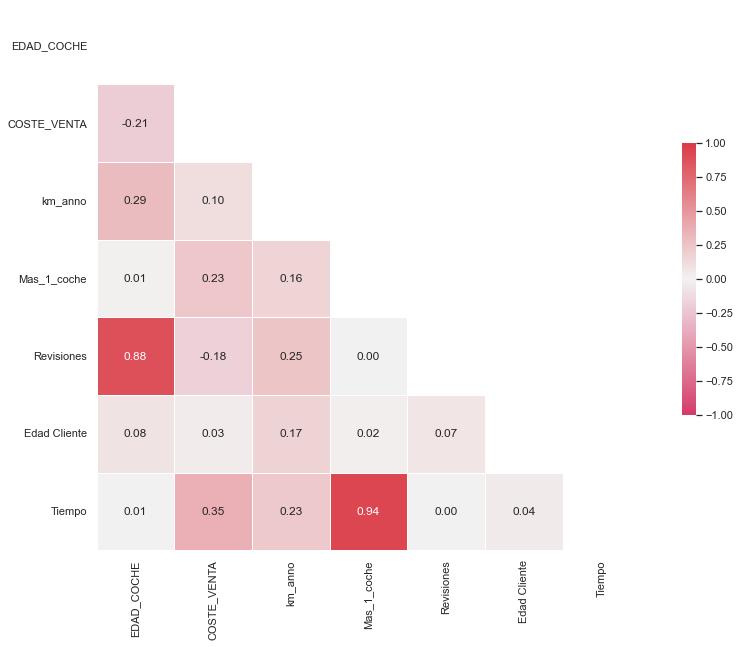

In [4]:
# Filtrar solo las columnas numéricas
numerical_data = data.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = numerical_data.corr()

# Crear el mapa de calor
plt.figure(figsize=(15, 10))
sns.set(style='white')

# Crear la máscara para el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Crear el mapa de calor con los valores de correlación anotados
cmap = sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(correlation_matrix, 
            mask=mask, 
            cmap=cmap, 
            annot=True,  # Mostrar los números
            fmt=".2f",  # Formato de los números a dos decimales
            vmin=-1, vmax=1, center=0, 
            square=True, 
            linewidths=0.5, 
            cbar_kws={"shrink": 0.5})

# Mostrar el gráfico
plt.show()

Fuerte correlación de la compra de mas de un coche con el tiempo entre compras y la edad del coche con las revisiones.

Podemos eliminar la variable numérica `edad cliente` ya que es la variable que presenta menos correlación con otras variables.

In [7]:
# Eliminamos la columna 'Edad Cliente' porque no tiene correlación con ninguna otra columna
data = data.drop(columns=['Edad Cliente'])

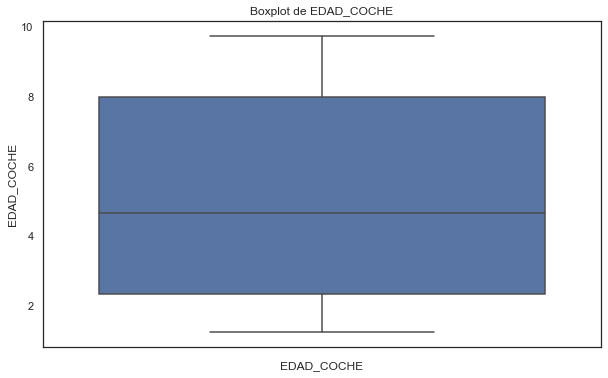

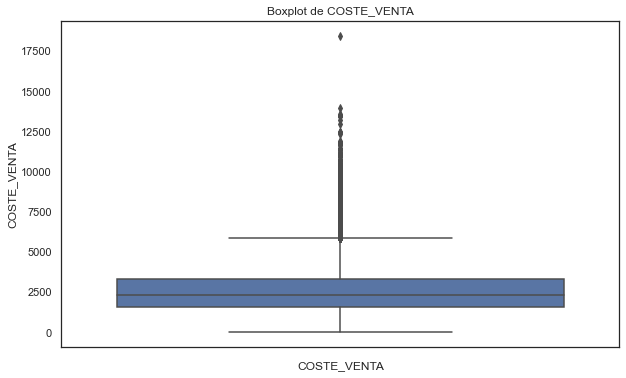

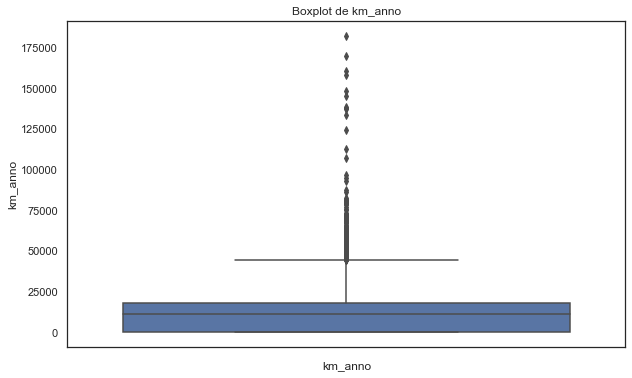

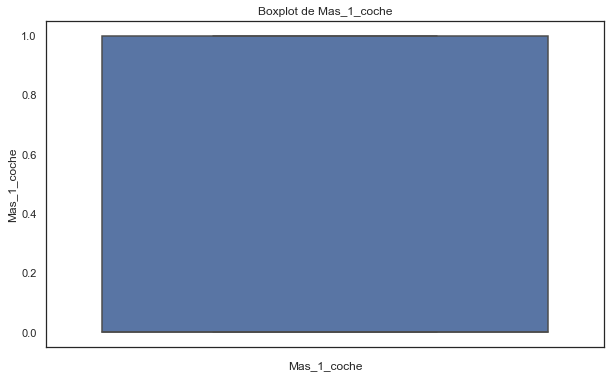

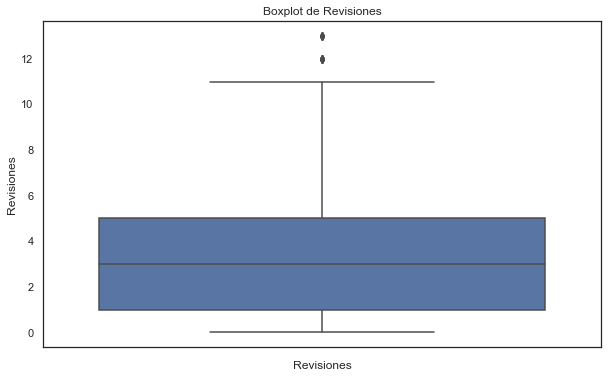

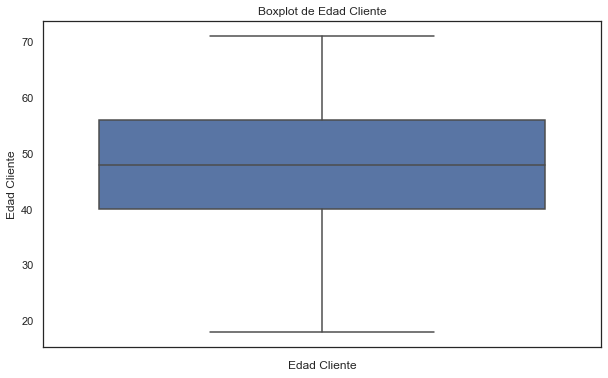

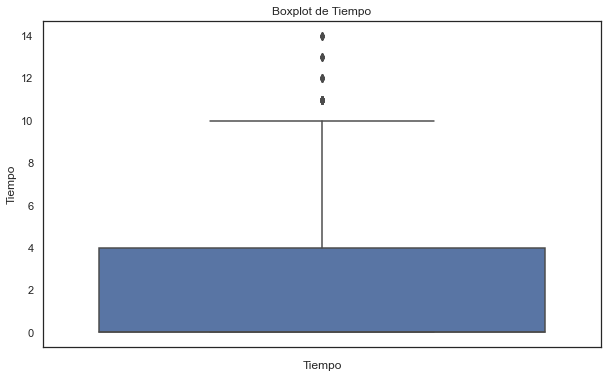

In [5]:
# Filtrar solo las columnas numéricas
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Crear un boxplot individual para cada columna numérica
for column in numerical_data.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=numerical_data[column])
    plt.title(f"Boxplot de {column}")
    plt.xlabel(column)
    plt.show()

*EDAD_COCHE*. Esta gráfica nos indica que la mayoría de los coches tiene entre 4 y 8 años de antigüedad, con una mediana de 6 años, y el rango total de edades oscila entre 1 y 10 años. No se observan datos atípicos o extremos en este boxplot.


*COSTE_VENTA*.

El rango intercuartilico se encuentra alrededor de 2,500 en términos de COSTE_VENTA, lo que sugiere que el 50% de los datos está concentrado en ese rango, posiblemente entre unos 2,000 y 3,000. La línea dentro de la caja marca la mediana del coste de venta, que está alrededor de los 2,500. Esto indica que la mitad de los datos tiene un coste de venta inferior a ese valor, y la otra mitad superior. Los bigotes se extienden hacia abajo y hacia arriba, lo que indica el rango de los valores que no son atípicos. En este caso, el bigote superior termina alrededor de 5,000, lo que sugiere que los valores por encima de esa cifra empiezan a considerarse atípicos o outliers. Hay muchos puntos por encima del bigote superior, lo que indica valores atípicos. Estos puntos representan coches cuyo coste es significativamente más alto que el resto. El valor más extremo parece estar cerca de 17,500, lo que indica que hay coches con un coste de venta muy alto en comparación con la mayoría. La dispersión de los datos es notable. Mientras que la mayoría de los valores se encuentran en un rango estrecho cerca de los 2,500, hay una cantidad considerable de valores atípicos por encima de los 5,000, lo que sugiere una gran variabilidad en los costes de venta, especialmente en el extremo superior.

Posibles soluciones:

(Eliminar outliers si son errores o irrelevantes.

Transformar los datos (log, raíz) para reducir el efecto de los outliers.

Agrupar en categorías si no necesitas tanta precisión en los valores.

Usar modelos robustos que manejen outliers de forma natural xgboost, random forest.)




*KM_ANNO*

Parece que la mayoría de los coches tienen un kilometraje anual entre 0 y algo por encima de 25,000 km al año. Esto sugiere que la mayoría de los vehículos no recorren distancias excesivamente largas en un año. La mediana parece estar alrededor de 15,000 km/año. Esto indica que la mitad de los coches recorren menos de este kilometraje anualmente, y la otra mitad recorre más. El bigote superior se extiende hasta un valor cercano a 30,000 km/año, lo que significa que este es el valor más alto considerado "normal" para el kilometraje anual de un coche. Existen muchos outliers por encima del bigote superior, algunos incluso muy alejados, lo que indica que hay coches que recorren un kilometraje anual extremadamente alto. El valor más extremo parece estar por encima de 175,000 km/año, lo cual es bastante inusual y sugiere que algunos vehículos recorren distancias considerablemente largas. La mayoría de los vehículos tienen un kilometraje anual concentrado en un rango relativamente bajo, pero hay una gran cantidad de valores atípicos, lo que muestra una alta dispersión en los extremos, especialmente hacia valores muy elevados de kilómetros recorridos al año.



*MAS_1_COCHE*  Es booleano así que no vale.


*REVISIONES*  La mayoría de los datos de "Revisiones" está concentrada entre 2 y 6, con una mediana de 4. Existen algunos valores inusualmente altos (12 y 13), que son considerados outliers en este conjunto de datos.


*EDAD CLIENTE*  La mayoría de las edades de los clientes están entre 40 y 60 años. La línea horizontal dentro de la caja indica la mediana, que parece estar cerca de 50 años. Esto significa que el 50% de los clientes tiene menos de 50 años y el otro 50% más de 50 años. Los bigotes muestran el rango de valores que no son considerados atípicos. El bigote inferior llega hasta cerca de 20 años, lo que indica que el cliente más joven está en esa edad. El bigote superior llega hasta alrededor de 70 años, lo que indica la edad del cliente más mayor dentro del rango normal. En este gráfico no hay puntos fuera de los bigotes, lo que indica que no hay valores atípicos (outliers) detectados en los datos. Los clientes tienen edades entre 20 y 70 años de forma bastante consistente.


*TIEMPO* 